In [26]:
import pandas as pd
from wordEmbedders import WESCScore, Word2Vec, AverageClassifier
from tqdm.notebook import tqdm
tqdm.pandas()

In [2]:
result = WESCScore.load('./plain.csv')

In [20]:
wordvectors = Word2Vec.load('../models/AirlineTweets/Word2Vec.model')

In [21]:
positiveWords = ["good", "nice", "cool", "lovely", "wonderful", "great", "awesome", "fantastic", "amazing", "fun", "excellent"]
negativeWords = ["bad", "horrible", "terrible", "awful", "worst", "shitty", "crappy", "sucks", "hate"]

In [22]:
classifier = AverageClassifier(wordvectors, positiveWords, negativeWords, None, None)

In [24]:
df = pd.read_csv('../data/AirlineTweets/Data-Cleaned.csv')

In [27]:
result = classifier.predict(df)

  0%|          | 0/11541 [00:00<?, ?it/s]

In [28]:
print(result.balancedAccuracy)
print(result.f1Score)

0.5384148067187106
0.16235893702220605


In [29]:
data = result.data
data['predicted'] = data['probability'].map(lambda prob: 'positive' if prob > 0.01 else 'negative')
result = WESCScore(data)
print(result.balancedAccuracy)
print(result.f1Score)

0.5
0.0


In [43]:
data = result.data
data['predicted'] = data['probability'].map(lambda prob: 'positive' if prob > -0.000001 else 'negative')
result = WESCScore(data)
print(result.balancedAccuracy)
print(result.f1Score)

0.5751877776873011
0.34229420604441474


array([[<AxesSubplot:title={'center':'probability'}>]], dtype=object)

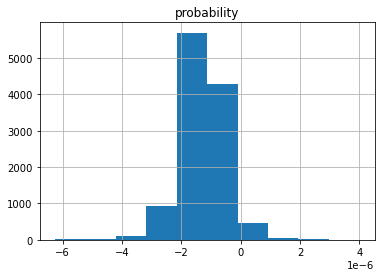

In [37]:
result.data.hist(column='probability')